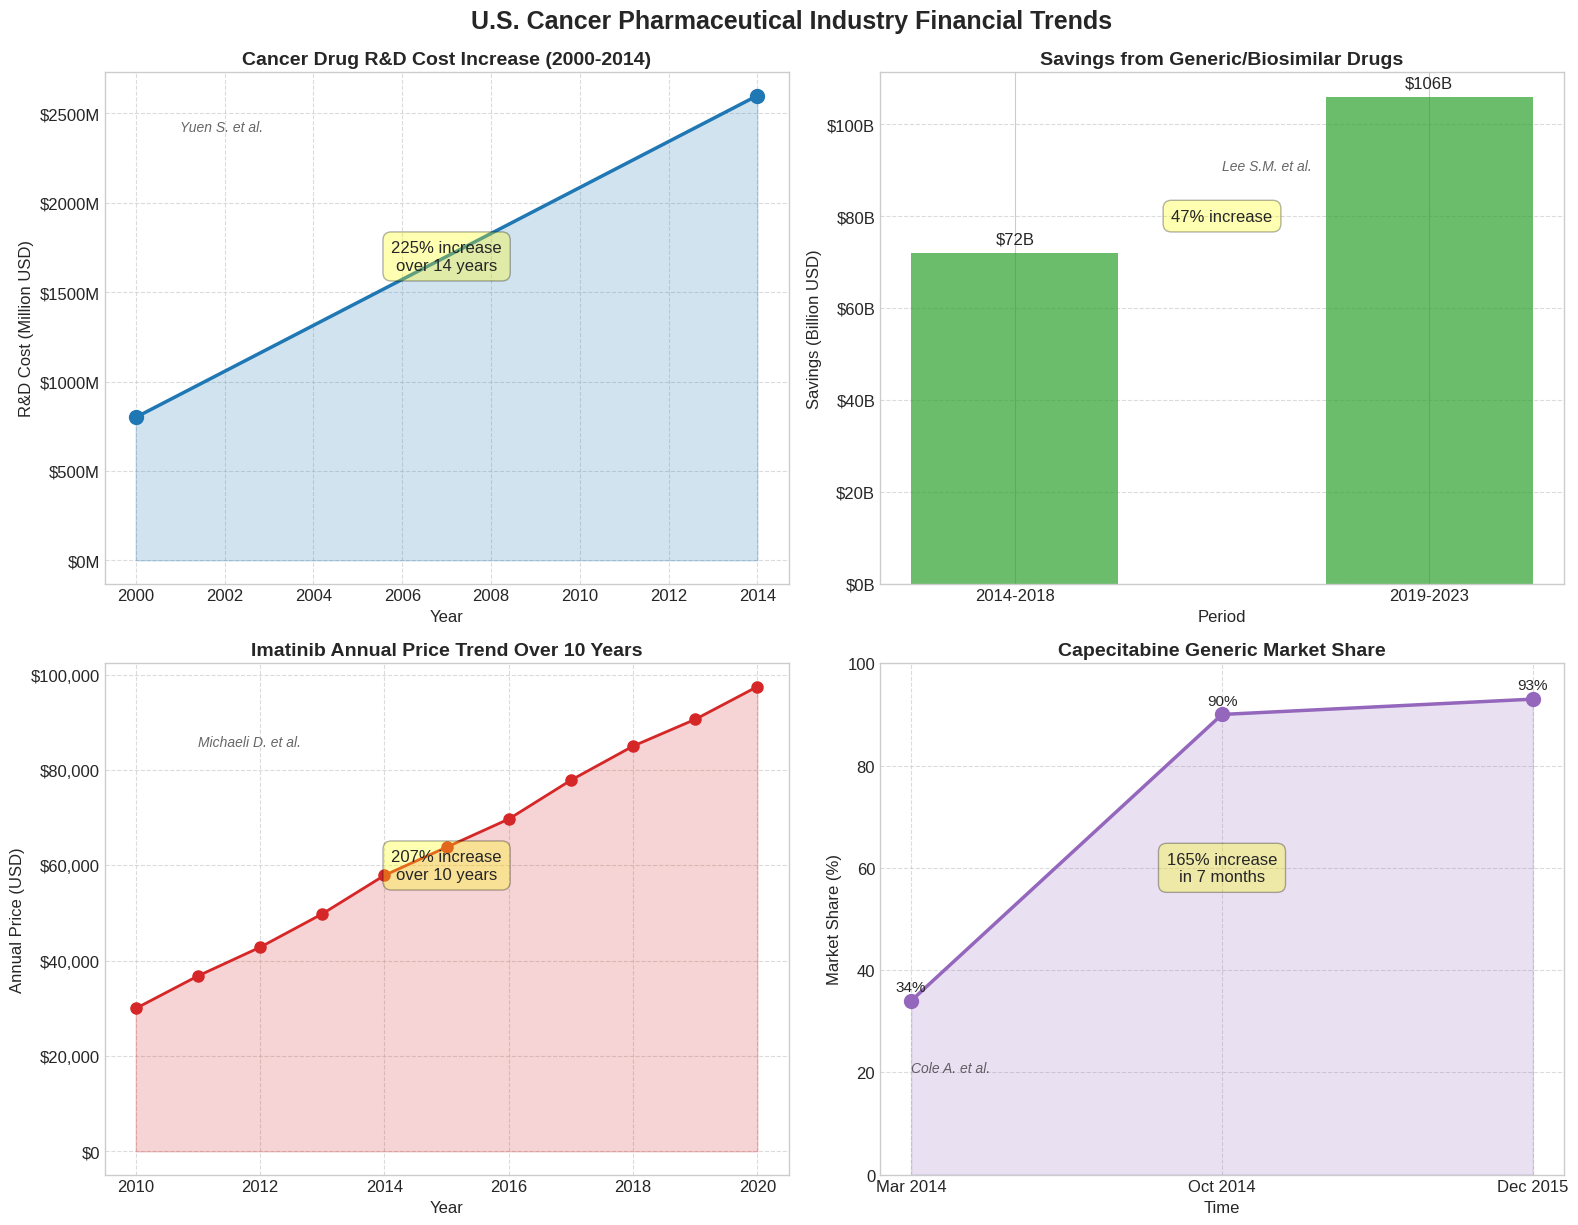

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# 1. R&D Cost Trends
years_rd = [2000, 2014]
costs_rd = [800, 2600]  # in millions USD - Yuen S. et al.

# 2. Generic Savings Data
periods = ['2014-2018', '2019-2023']
savings = [72, 106]  # in billions USD - Lee S.M. et al.

# 3. Imatinib Price Trend
# Exact years not provided, assuming 10-year period - Michaeli D. et al.
years_imatinib = np.linspace(2010, 2020, 11).astype(int)
# Price increased from "$30,000" to "$92,000" over 10 years
start_price = 30000  # Michaeli D. et al.
end_price = 92000    # Michaeli D. et al.
# Create a realistic price progression with some year-to-year variations
np.random.seed(42)  # For reproducibility
yearly_increases = np.diff(np.linspace(start_price, end_price, 11)) * (1 + 0.2 * np.random.randn(10))
imatinib_prices = [start_price]
for inc in yearly_increases:
    imatinib_prices.append(imatinib_prices[-1] + inc)

# 4. Capecitabine Generic Market Share - Cole A. et al.
dates_cape = ['Mar 2014', 'Oct 2014', 'Dec 2015']
share_cape = [34, 90, 93]  # Percentage - Cole A. et al.

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Format for displaying dollar values in billions
def billions_formatter(x, pos):
    return f'${x:.0f}B'

# Format for displaying dollar values in millions
def millions_formatter(x, pos):
    return f'${x:.0f}M'

# Format for displaying dollar values
def dollars_formatter(x, pos):
    return f'${x:,.0f}'

# Plot 1: R&D Costs
axs[0, 0].plot(years_rd, costs_rd, 'o-', linewidth=2.5, markersize=10, color='#1f77b4')
axs[0, 0].set_title('Cancer Drug R&D Cost Increase (2000-2014)', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Year', fontsize=12)
axs[0, 0].set_ylabel('R&D Cost (Million USD)', fontsize=12)
axs[0, 0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].text(2001, 2400, 'Yuen S. et al.', fontsize=10, style='italic', alpha=0.7)
axs[0, 0].fill_between(years_rd, [0, 0], costs_rd, alpha=0.2, color='#1f77b4')
axs[0, 0].annotate(f'225% increase\nover 14 years',
                   xy=(2007, 1700), xytext=(2007, 1700),
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Plot 2: Generic Savings
axs[0, 1].bar(periods, savings, color='#2ca02c', alpha=0.7, width=0.5)
axs[0, 1].set_title('Savings from Generic/Biosimilar Drugs', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Period', fontsize=12)
axs[0, 1].set_ylabel('Savings (Billion USD)', fontsize=12)
axs[0, 1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))
axs[0, 1].grid(True, linestyle='--', alpha=0.7, axis='y')
for i, v in enumerate(savings):
    axs[0, 1].text(i, v + 2, f'${v}B', ha='center', fontsize=12)
axs[0, 1].text(0.5, 90, 'Lee S.M. et al.', fontsize=10, style='italic', alpha=0.7)
axs[0, 1].annotate(f'47% increase',
                   xy=(0.5, 80), xytext=(0.5, 80),
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Plot 3: Imatinib Price Trend
axs[1, 0].plot(years_imatinib, imatinib_prices, 'o-', linewidth=2, markersize=8, color='#d62728')
axs[1, 0].set_title('Imatinib Annual Price Trend Over 10 Years', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Year', fontsize=12)
axs[1, 0].set_ylabel('Annual Price (USD)', fontsize=12)
axs[1, 0].yaxis.set_major_formatter(FuncFormatter(dollars_formatter))
axs[1, 0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].fill_between(years_imatinib, [0] * len(years_imatinib), imatinib_prices, alpha=0.2, color='#d62728')
axs[1, 0].text(2011, 85000, 'Michaeli D. et al.', fontsize=10, style='italic', alpha=0.7)
axs[1, 0].annotate(f'207% increase\nover 10 years',
                   xy=(2015, 60000), xytext=(2015, 60000),
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Plot 4: Capecitabine Generic Market Share
axs[1, 1].plot(dates_cape, share_cape, 'o-', linewidth=2.5, markersize=10, color='#9467bd')
axs[1, 1].set_title('Capecitabine Generic Market Share', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Time', fontsize=12)
axs[1, 1].set_ylabel('Market Share (%)', fontsize=12)
axs[1, 1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].set_ylim([0, 100])
for i, (date, share) in enumerate(zip(dates_cape, share_cape)):
    axs[1, 1].annotate(f'{share}%',
                      xy=(date, share), xytext=(0, 7),
                      textcoords='offset points',
                      ha='center', fontsize=11)
axs[1, 1].fill_between(dates_cape, [0, 0, 0], share_cape, alpha=0.2, color='#9467bd')
axs[1, 1].text(dates_cape[0], 20, 'Cole A. et al.', fontsize=10, style='italic', alpha=0.7)
axs[1, 1].annotate(f'165% increase\nin 7 months',
                   xy=(dates_cape[1], 60), xytext=(dates_cape[1], 60),
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.suptitle('U.S. Cancer Pharmaceutical Industry Financial Trends', fontsize=18, fontweight='bold', y=1.02)
plt.savefig('cancer_pharma_financial_trends.png', dpi=300, bbox_inches='tight')
plt.show()